<a href="https://colab.research.google.com/github/suryadeepti/Stock_price_predict/blob/main/Stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Artificial RNN  # LSTM # To predict the closing stock price of apple.inc. Using past 0 days stock price.

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [49]:
df=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-1-14')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2021-01-08,132.630005,130.229996,132.429993,132.050003,104965400.0,132.050003
2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996
2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003


In [50]:
df.shape

(2274, 6)

Text(0, 0.5, 'High-Low price in usd, ($)')

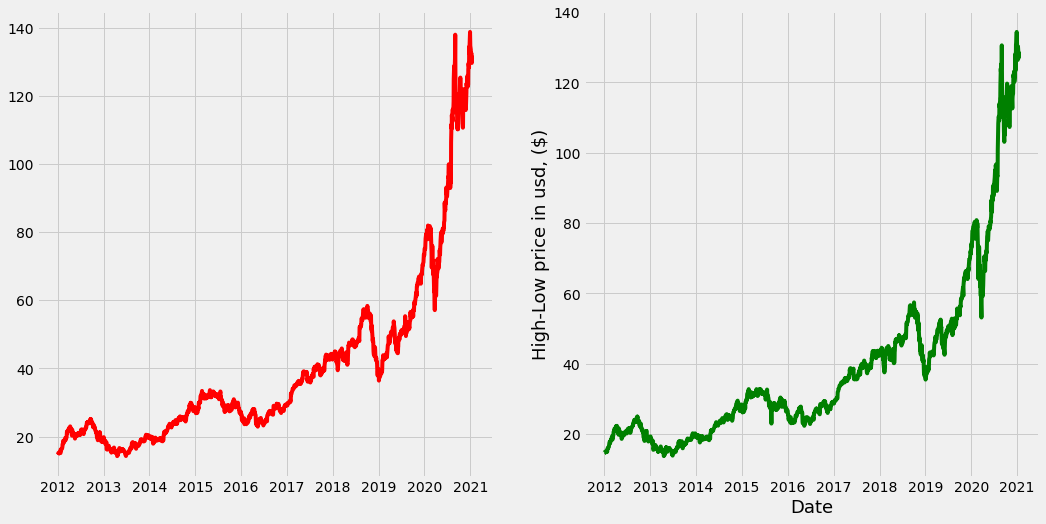

In [51]:
#visualize closing price
plt.figure(figsize=(16,8))
plt.title('HIgh-Low price')
plt.subplot(1,2,1)
plt.plot(df['High'],color='red')
plt.subplot(1,2,2)
plt.plot(df['Low'],color='green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('High-Low price in usd, ($)',fontsize=18)

Text(0, 0.5, 'opening price in usd, ($)')

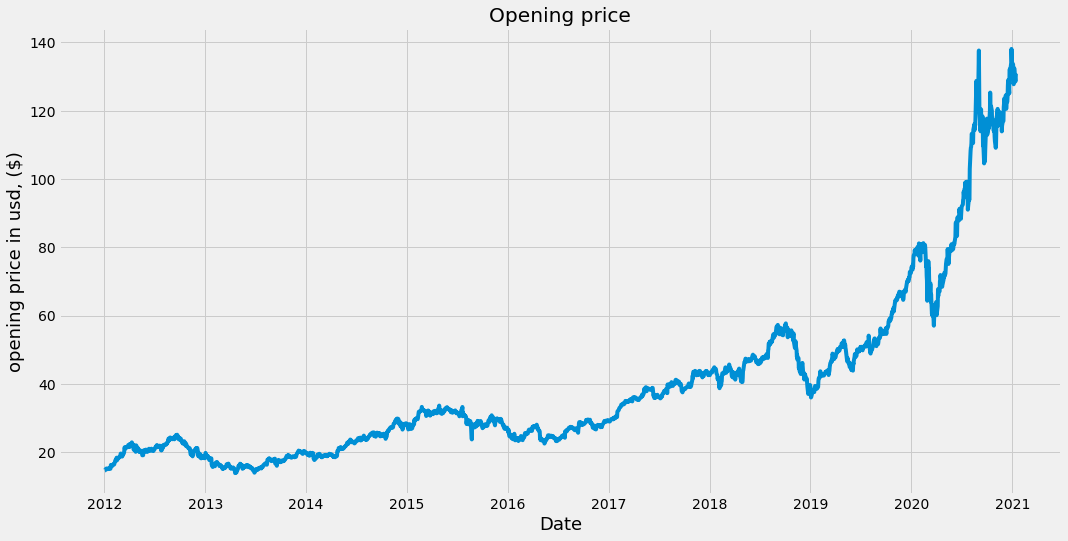

In [52]:
plt.figure(figsize=(16,8))
plt.title('Opening price')
plt.plot(df['Open'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('opening price in usd, ($)',fontsize=18)

In [53]:
data=df.filter(['Close'])
#data=df['Close']
dataset=data.values
#data_length=len(dataset)
data_len=math.ceil(len(dataset)*.8)

data_len


1820

In [54]:

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.93571909],
       [0.95274658],
       [0.93661528]])

In [55]:
train_data=scaled_data[0 : data_len,:]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00

In [56]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [57]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [58]:
x_train.shape

(1760, 60, 1)

In [59]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))             #because we are not going to use lstm layers for our model
model.add(Dense(25))
model.add(Dense(1))


In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
model.fit(x_train, y_train,batch_size=1, epochs=1)

1760/1760 [==============================] - 42s 23ms/step - loss: 0.0011


In [62]:
test_data=scaled_data[data_len-60:, :]


In [63]:
x_test=[]
y_test=dataset[data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [64]:
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


In [65]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [66]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.3702927223911369

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


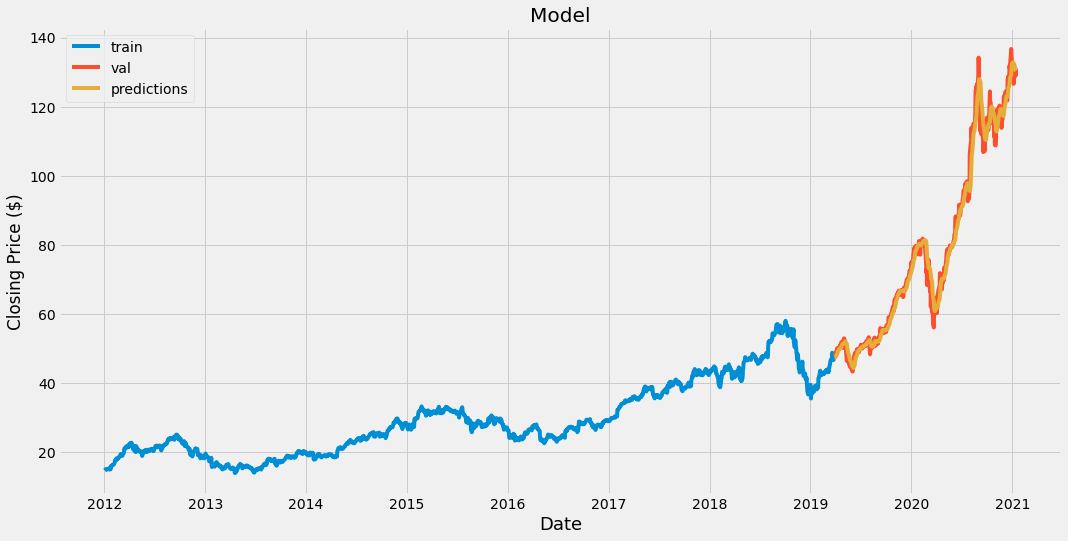

In [67]:
train=data[:data_len]
valid=data[data_len:]
valid['predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train', 'val', 'predictions'], loc='lower_right')


In [68]:
valid

,Close,predictions
Date,,
2019-03-29,47.487499,47.375633
2019-04-01,47.810001,47.411381
2019-04-02,48.505001,47.482361
2019-04-03,48.837502,47.636276
2019-04-04,48.922501,47.853588
...,...,...
2021-01-08,132.050003,131.302856
2021-01-11,128.979996,131.163162
2021-01-12,128.800003,130.826035


In [69]:
apple_quote=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-14')
new_data=apple_quote.filter(['Close'])
last_60_days=new_data[-60:].values
scaled=scaler.transform(last_60_days)
x_test=[]
x_test.append(scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,  (x_test.shape[0], x_test.shape[1],1))
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[130.08281]]


In [70]:
apple_quote2=web.DataReader('AAPL', data_source='yahoo', start='2021-01-15', end='2021-01-15')
print(apple_quote2['Close'])

Date
2021-01-15    127.139999
Name: Close, dtype: float64
